# Notebook 01: Data Overview and RUL Analysis
## Epoch 003: Exploratory Data Analysis
### Preventative Maintenance - NASA Turbofan Dataset

This notebook provides an overview of the NASA Turbofan FD001 dataset and analyzes the Remaining Useful Life (RUL) target variable.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add utilities to path
sys.path.insert(0, '/mnt/code/src')
from predictive_maintenance.data_utils import load_turbofan_data, calculate_rul

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

print('Libraries imported successfully')

Libraries imported successfully


## 1. Load Dataset

In [2]:
# Load data
DATA_PATH = Path('/mnt/data/Preventative-Maintainance-Example/epoch002-data-wrangling')
df = load_turbofan_data(DATA_PATH / 'fd001_train.parquet')

print(f'Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns')
print(f'Number of engines: {df["unit_id"].nunique()}')
print(f'Time cycles range: {df["time_cycles"].min()} to {df["time_cycles"].max()}')

Dataset loaded: 24,453 rows × 26 columns
Number of engines: 100
Time cycles range: 1 to 355


## 2. Dataset Structure

In [3]:
# Show first few rows
df.head(10)

,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0,0.0006,100.0,513.300461,648.854883,1605.802692,1439.846460,14.361455,...,520.335945,2390.638728,8074.294916,8.335438,0.029949,393.996751,2352.878834,100.350147,38.858412,23.965575
1,1,2,0.0,0.0006,100.0,518.259959,635.916470,1652.588172,1345.654400,14.966389,...,528.246794,2357.489830,7924.945104,8.371021,0.029762,393.033897,2382.695379,102.532220,39.453483,23.369159
2,1,3,0.0,0.0006,100.0,510.274180,658.333410,1617.785491,1477.740459,14.725648,...,517.325013,2390.612878,8109.731997,8.172768,0.029581,400.062738,2425.042345,101.592533,39.070954,23.775021
3,1,4,0.0,0.0006,100.0,522.524309,641.335165,1630.879698,1397.369855,14.433088,...,513.278718,2431.703714,8059.766380,8.497520,0.029250,390.821087,2391.372693,102.183217,40.355889,23.752076
4,1,5,0.0,0.0006,100.0,523.448962,630.715586,1549.780948,1410.498894,14.707368,...,513.393745,2375.997697,7937.482568,8.389015,0.030548,390.709679,2354.637033,99.809717,39.344972,22.863339
5,1,6,0.0,0.0006,100.0,510.128329,645.961849,1556.195751,1460.567187,14.632373,...,523.539737,2396.056916,8303.594008,8.274861,0.029662,397.120052,2394.269652,101.081109,38.949817,23.397582
6,1,7,0.0,0.0006,100.0,535.908271,658.431002,1517.511778,1448.461007,15.317956,...,523.813204,2457.096407,8112.381552,8.383373,0.030364,408.950869,2402.768905,99.623609,39.703856,23.862270
7,1,8,0.0,0.0006,100.0,511.506107,638.286261,1632.857125,1419.896974,13.974138,...,517.854524,2375.526266,8183.203924,8.527040,0.030194,397.977733,2393.441018,100.882985,39.812599,23.042440
8,1,9,0.0,0.0006,100.0,522.842078,646.944829,1628.302525,1402.469964,14.896764,...,516.342204,2401.804670,8123.995706,8.391034,0.029509,401.099949,2447.790367,101.423194,37.621882,24.621249
9,1,10,0.0,0.0006,100.0,523.577257,652.932422,1552.430797,1409.413794,14.836213,...,525.013136,2328.571435,8432.576493,8.541223,0.029126,392.650348,2419.202102,101.665325,39.014260,23.731727


In [4]:
# Column types
print('Column Types:')
print(df.dtypes)

Column Types:
unit_id           int64
time_cycles       int64
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
sensor_1        float64
sensor_2        float64
sensor_3        float64
sensor_4        float64
sensor_5        float64
sensor_6        float64
sensor_7        float64
sensor_8        float64
sensor_9        float64
sensor_10       float64
sensor_11       float64
sensor_12       float64
sensor_13       float64
sensor_14       float64
sensor_15       float64
sensor_16       float64
sensor_17       float64
sensor_18       float64
sensor_19       float64
sensor_20       float64
sensor_21       float64
dtype: object


In [5]:
# Identify column groups
sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
op_setting_cols = [col for col in df.columns if col.startswith('op_setting')]

print(f'Sensor columns: {len(sensor_cols)}')
print(f'Operational settings: {len(op_setting_cols)}')
print(f'\nSensor columns: {sensor_cols}')

Sensor columns: 21
Operational settings: 3

Sensor columns: ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


## 3. Calculate RUL (Remaining Useful Life)

In [6]:
# Calculate RUL
df = calculate_rul(df)

print('RUL calculated and added to dataframe')
print(f'\nRUL range: {df["RUL"].min()} to {df["RUL"].max()} cycles')

RUL calculated and added to dataframe

RUL range: 0 to 354 cycles


In [7]:
# Example: Show one engine's lifecycle
engine_1 = df[df['unit_id'] == 1].sort_values('time_cycles')
print(f'Engine 1 lifecycle:')
print(engine_1[['unit_id', 'time_cycles', 'RUL']].head(10))
print('...')
print(engine_1[['unit_id', 'time_cycles', 'RUL']].tail(10))

Engine 1 lifecycle:
   unit_id  time_cycles  RUL
0        1            1  229
1        1            2  228
2        1            3  227
3        1            4  226
4        1            5  225
5        1            6  224
6        1            7  223
7        1            8  222
8        1            9  221
9        1           10  220
...
     unit_id  time_cycles  RUL
220        1          221    9
221        1          222    8
222        1          223    7
223        1          224    6
224        1          225    5
225        1          226    4
226        1          227    3
227        1          228    2
228        1          229    1
229        1          230    0


## 4. RUL Distribution Analysis

In [8]:
# RUL statistics
rul_stats = df['RUL'].describe()
print('RUL Statistics:')
print(rul_stats)

RUL Statistics:
count    24453.000000
mean       131.801088
std         85.252525
min          0.000000
25%         61.000000
50%        122.000000
75%        195.000000
max        354.000000
Name: RUL, dtype: float64


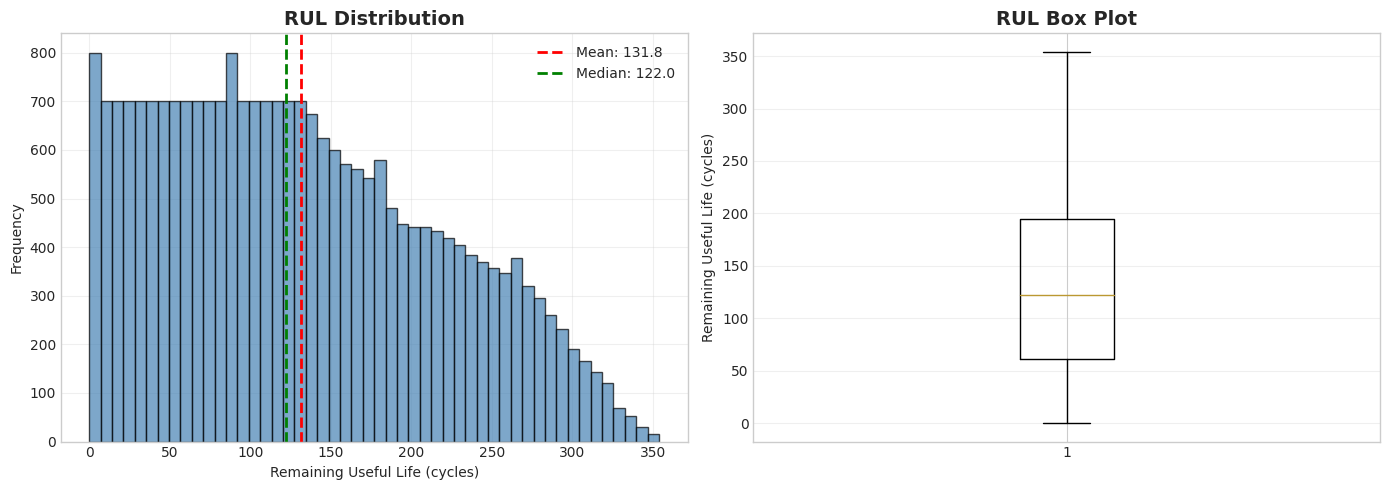

✓ RUL distribution plots created


In [9]:
# Plot RUL distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['RUL'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['RUL'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {df["RUL"].mean():.1f}')
axes[0].axvline(df['RUL'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {df["RUL"].median():.1f}')
axes[0].set_title('RUL Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Remaining Useful Life (cycles)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['RUL'], vert=True)
axes[1].set_title('RUL Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Remaining Useful Life (cycles)')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/mnt/artifacts/epoch003-exploratory-data-analysis/01_rul_distribution.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print('✓ RUL distribution plots created')

## 5. Engine Lifetime Analysis

In [10]:
# Calculate engine lifetimes (max cycles for each engine)
engine_lifetimes = df.groupby('unit_id')['time_cycles'].max().sort_values()

print('Engine Lifetime Statistics:')
print(engine_lifetimes.describe())

Engine Lifetime Statistics:
count    100.000000
mean     244.530000
std       70.411841
min      136.000000
25%      176.750000
50%      256.000000
75%      304.750000
max      355.000000
Name: time_cycles, dtype: float64


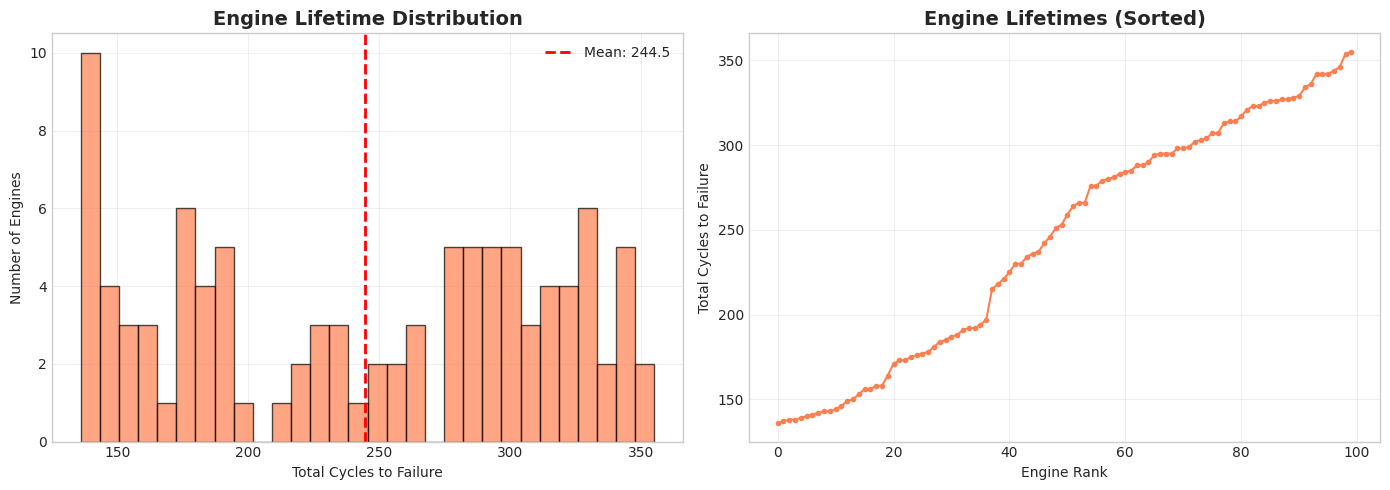

✓ Engine lifetime plots created


In [11]:
# Plot engine lifetimes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(engine_lifetimes, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].axvline(engine_lifetimes.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {engine_lifetimes.mean():.1f}')
axes[0].set_title('Engine Lifetime Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Cycles to Failure')
axes[0].set_ylabel('Number of Engines')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Sorted lifetimes
axes[1].plot(range(len(engine_lifetimes)), engine_lifetimes.values, marker='o', 
             linestyle='-', markersize=3, color='coral')
axes[1].set_title('Engine Lifetimes (Sorted)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Engine Rank')
axes[1].set_ylabel('Total Cycles to Failure')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/artifacts/epoch003-exploratory-data-analysis/01_engine_lifetimes.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print('✓ Engine lifetime plots created')

## 6. Data Quality Check

In [12]:
# Missing values
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_pct
})

print('Missing Values Summary:')
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print('\n✓ No missing values detected!')

Missing Values Summary:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

✓ No missing values detected!


In [13]:
# Duplicates
num_duplicates = df.duplicated().sum()
print(f'Duplicate rows: {num_duplicates}')

if num_duplicates == 0:
    print('✓ No duplicate rows detected!')

Duplicate rows: 0
✓ No duplicate rows detected!


## 7. Summary

### Key Findings:
- Dataset contains 100 engines with complete run-to-failure data
- Total of 24,453 timestep observations
- 21 sensor measurements + 3 operational settings
- RUL ranges from 0 to 354 cycles
- Average engine lifetime: ~245 cycles
- Data quality: 100% complete (no missing values)

### Next Steps:
- Analyze individual sensor distributions (Notebook 02)
- Examine temporal degradation patterns (Notebook 03)
- Study sensor correlations (Notebook 04)
- Identify most predictive features (Notebook 05)